#Inferencia estadística con estimación
La inferencia estadística es el proceso de analizar datos de muestra para obtener información sobre la población de la que se recopilaron los datos e investigar las diferencias entre las muestras de datos. En el análisis de datos, a menudo nos interesan las características de una gran población, pero la recopilación de los datos completos de ella suele ser inviable. Por ejemplo, antes de las elecciones presidenciales podría ser muy útil conocer las inclinaciones políticas de cada votante, pero encuestar a todos ellos normalmente no es factible. En su lugar, podríamos encuestar a algún subconjunto de la población, por ejemplo mil votantes y usar esos datos para hacer inferencia sobre la población en su conjunto.

# Estimación puntual

Las estimaciones puntuales son estimaciones de parámetros de población basadas en datos de muestra. Por ejemplo, si quisiéramos saber la edad promedio de los votantes, podríamos realizar una encuesta y luego usar la edad promedio de los encuestados como una estimación puntual de la edad promedio de la población en general. El promedio de una muestra se conoce como media muestral.

La media muestral no suele ser exactamente igual a la media poblacional. Esta diferencia puede deberse a muchos factores, incluido el diseño deficiente de la encuesta, los métodos de muestreo sesgados y la aleatoriedad inherente a la extracción de una muestra de una población.

 Investiguemos las estimaciones puntuales generando una población de datos de edad aleatorios y luego extrayendo una muestra para estimar la media:

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

In [2]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [3]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,
                               size=500)            # Sample 500 values

print ( sample_ages.mean() )                         # Show sample mean

population_ages.mean() - sample_ages.mean()   # Check difference between means

42.388


0.614372000000003

Nuestra estimación puntual basada en una muestra de 500 individuos subestima la verdadera media de la población en 0.6 años, pero está cerca. Esto ilustra un punto importante: **podemos obtener una estimación bastante precisa de una gran población muestreando un subconjunto relativamente pequeño de individuos**.

Otra estimación puntual que puede ser de interés es la proporción de la población que pertenece a alguna categoría o subgrupo. Por ejemplo, nos gustaría saber la raza de cada votante que encuestamos, para tener una idea de la demografía general de la base de votantes. Puede hacer una estimación puntual de este tipo de proporción tomando una muestra y luego verificando la proporción en la muestra:

In [4]:
random.seed(10)
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
 
demo_sample = random.sample(population_races, 1000)   # Sample 1000 values of the 2500000 total

for race in set(demo_sample):
    print( race + " proportion estimate:" )
    print( demo_sample.count(race)/1000 )

white proportion estimate:
0.379
asian proportion estimate:
0.099
hispanic proportion estimate:
0.192
black proportion estimate:
0.231
other proportion estimate:
0.099


Se observa que las estimaciones de proporción están cerca de las verdaderas proporciones de la población subyacente.

# Distribuciones de muestreo y el teorema central del límite
Muchos procedimientos estadísticos asumen que los datos siguen una distribución normal. Esto es porque la distribución normal tiene buenas propiedades como la simetría y tener la mayoría de los datos agrupados dentro de unas pocas desviaciones estándar de la media. Desafortunadamente, los datos del mundo real a menudo no se distribuyen normalmente y la distribución de una muestra tiende a reflejar la distribución de la población. Esto significa que una muestra tomada de una población con una distribución sesgada también tenderá a estar sesgada. Investiguemos trazando los datos y la muestra que creamos anteriormente y comprobando el sesgo:

-0.12008483603917186


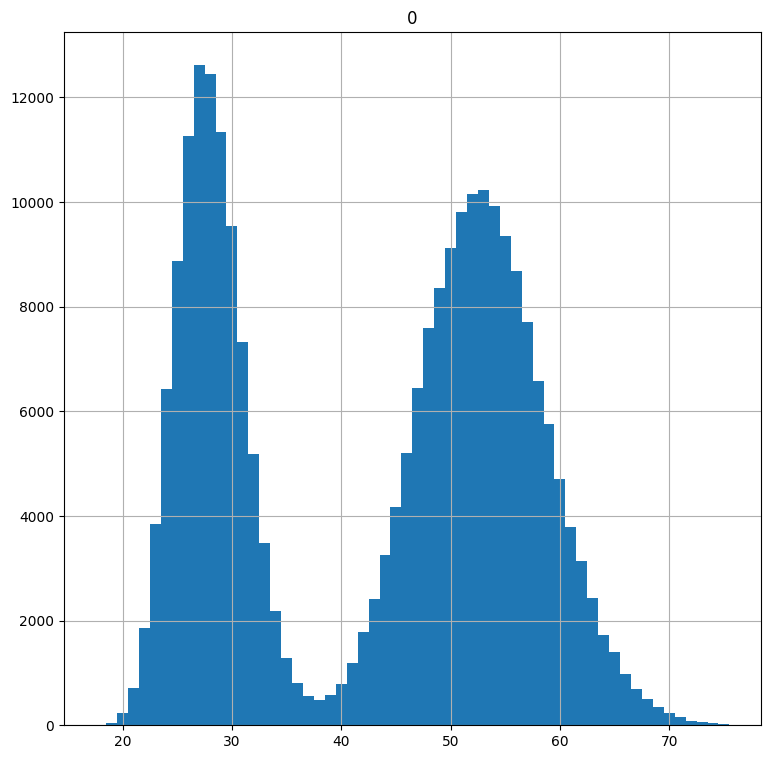

In [5]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_ages) );

La distribución tiene poca asimetría, pero el gráfico revela que los datos claramente no son normales: en lugar de una curva de campana simétrica, tiene una distribución bimodal con dos picos de alta densidad. La muestra que extrajimos de esta población debería tener aproximadamente la misma forma y sesgo:

-0.056225282585406065


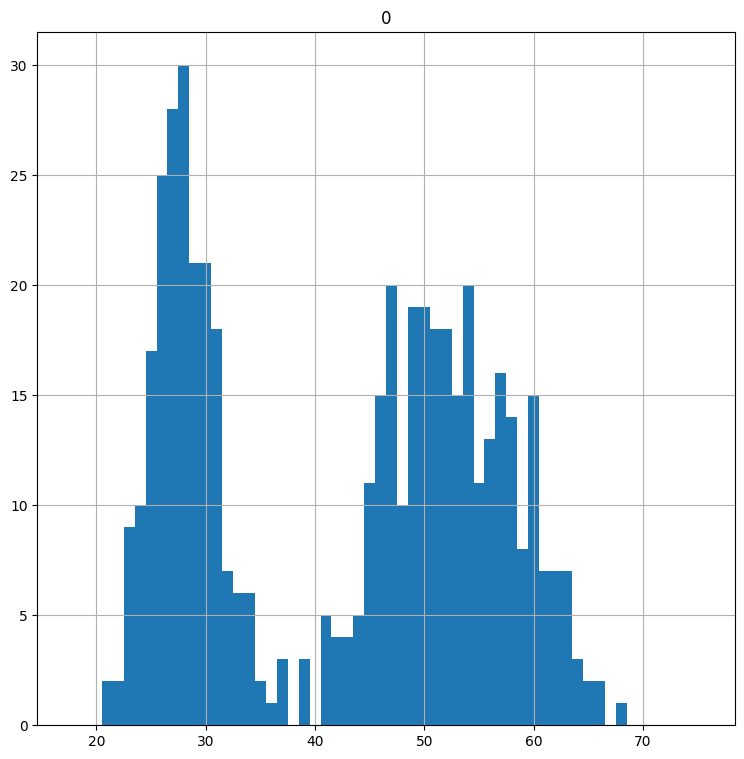

In [6]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9));

print( stats.skew(sample_ages) )

La muestra tiene aproximadamente la misma forma que la población subyacente. Esto sugiere que no podemos aplicar técnicas que supongan una distribución normal a este conjunto de datos, ya que no es normal. No obstante, contamos con el teorema central del límite.

El teorema central del límite es uno de los resultados más importantes de la teoría de la probabilidad y sirve como base de muchos métodos de análisis estadístico. En un nivel alto, la teoría establece que la distribución de muchas medias muestrales, conocida como distribución en el muestreo, se distribuirá normalmente. Esta regla se cumple incluso si la distribución subyacente en sí misma no se distribuye normalmente. Como resultado, podemos tratar la media de la muestra como si fuera una distribución normal.

Para ilustrar, vamos a crear una distribución de muestreo tomando 200 muestras de nuestra población y luego haciendo estimaciones de 200 puntos de la media:

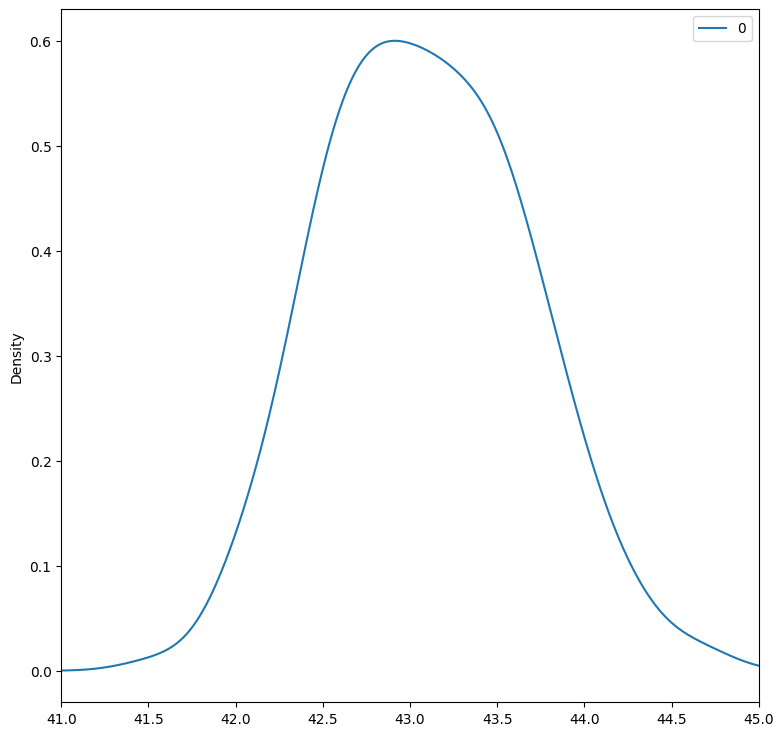

In [7]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(41,45));  

La distribución de muestreo parece ser más o menos normal, a pesar de la distribución de población bimodal de la que se extrajeron las muestras. Además, la media de la distribución muestral se aproxima a la verdadera media poblacional:

In [8]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

Cuantas más muestras tomemos, mejor será probablemente nuestra estimación del parámetro de la población.

# Intervalos de confianza
Una estimación puntual puede darle una idea aproximada de un parámetro de población como la media, pero las estimaciones son propensas a errores y puede que no sea factible tomar varias muestras para obtener estimaciones mejoradas. Un intervalo de confianza es un rango de valores por encima y por debajo de una estimación puntual que captura el verdadero parámetro de la población en algún nivel de confianza predeterminado. Por ejemplo, si deseamos tener un 95 % de posibilidades de capturar el parámetro de población real con una estimación puntual y un intervalo de confianza correspondiente, estableceriamos su nivel de confianza en 95 %. Los niveles de confianza más altos dan como resultado intervalos de confianza más amplios.

Calculamos un intervalo de confianza tomando una estimación puntual y luego sumando y restando un margen de error para crear un rango. El margen de error se basa en el nivel de confianza deseado, la dispersión de los datos y el tamaño de la muestra. La forma en que se calcula el margen de error depende de si conoce o no la desviación estándar de la población.

Si conoce la desviación estándar de la población, el margen de error es igual a:







> z $*$ $\dfrac{\sigma}{\sqrt{n}}$



Donde $\sigma$ (sigma) es la desviación estándar de la población, n es el tamaño de la muestra y z es un número conocido como valor crítico z. El valor crítico z es el número de desviaciones estándar que tendría que pasar de la media de la distribución normal para capturar la proporción de los datos asociados con el nivel de confianza deseado. Por ejemplo, sabemos que aproximadamente el 95 % de los datos en una distribución normal se encuentran dentro de 2 desviaciones estándar de la media, por lo que podríamos usar 2 como el valor crítico z para un intervalo de confianza del 95 % (aunque es más exacto obtener valores críticos z con stats.norm.ppf().).

Calculamos una confianza del 95 % para nuestra estimación puntual media:

In [18]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value* Calculamos el valor que nos deja por debajo el 2.5% de la distribución normal

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(41.70306406882683, 43.34293593117317)


Nota: Usamos stats.norm.ppf(q = 0.975) para obtener el valor crítico z deseado en lugar de q = 0.95 porque la distribución tiene dos colas.

Observe que el intervalo de confianza que calculamos captura la verdadera media poblacional de 43.0023.

Vamos a crear varios intervalos de confianza y trazarlos para tener una mejor idea de lo que significa "capturar" la verdadera media:

In [29]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(75):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = population_ages.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)



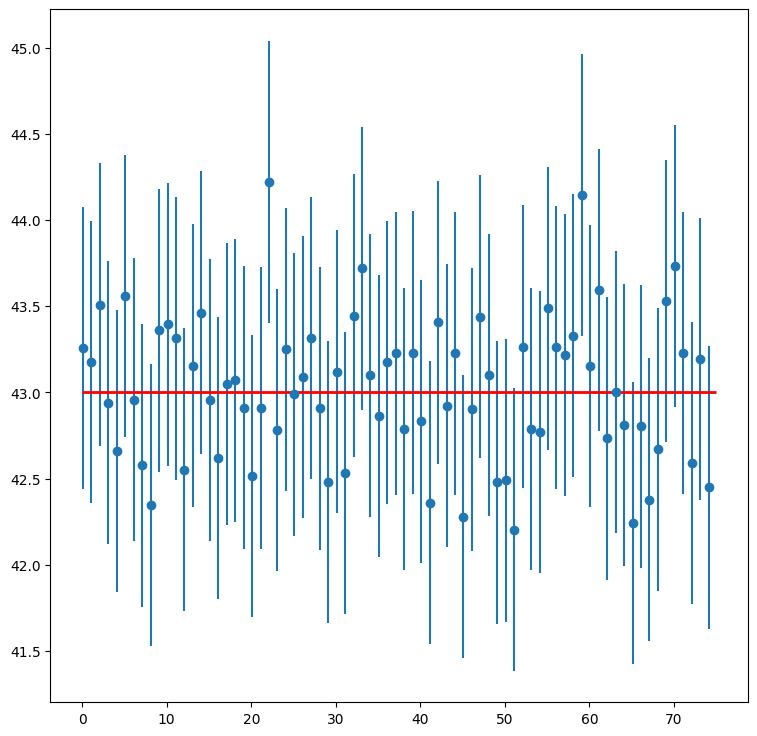

In [32]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 75, 1), 
             y=sample_means, 
             yerr=[abs((top-bot)/2) for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=75,
           y=43.0023, 
           linewidth=2.0,
           color="red");

Observe que en el gráfico anterior, todos menos uno de los intervalos de confianza del 95 % se superponen a la línea roja que marca la media verdadera. Esto es de esperar: dado que un intervalo de confianza del 95 % captura la media real el 95 % de las veces, esperaríamos que nuestro intervalo pierda la media real el 5 % de las veces.

Si no se conoce la desviación estándar de la población, se debe usar la desviación estándar de su muestra como sustituto al crear intervalos de confianza. Dado que la desviación estándar de la muestra puede no coincidir con el parámetro de la población, el intervalo tendrá más error cuando no se conozca la desviación estándar de la población. Para dar cuenta de este error, usamos lo que se conoce como valor crítico t en lugar del valor crítico z. El valor t-crítico se extrae de lo que se conoce como distribución t, una distribución que se parece mucho a la distribución normal pero que se hace más y más ancha a medida que disminuye el tamaño de la muestra. La distribución t está disponible en scipy.stats con el apodo "t" para que podamos obtener valores críticos de t con stats.t.ppf().

Tomamos una muestra nueva y más pequeña y luego creemos un intervalo de confianza sin la desviación estándar de la población, usando la distribución t:

In [33]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


Nota: al usar la distribución t, debe proporcionar los grados de libertad (df). Para este tipo de prueba, los grados de libertad son iguales al tamaño de la muestra menos 1. Si tiene un tamaño de muestra grande, la distribución t se aproxima a la distribución normal.

Observe que el valor crítico t es mayor que el valor crítico z que usamos para el intervalo de confianza del 95 %. Esto permite que el intervalo de confianza arroje una red más grande para compensar la variabilidad causada por el uso de la desviación estándar de la muestra en lugar de la desviación estándar de la población. El resultado final es un intervalo de confianza mucho más amplio (un intervalo con un mayor margen de error).

Si tiene una muestra grande, el valor t-crítico se acercará al valor z-crítico, por lo que hay poca diferencia entre usar la distribución normal y la distribución t:

En lugar de calcular a mano un intervalo de confianza para una estimación puntual media, puede calcularlo utilizando la función de Python stats.t.interval():

In [34]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate


/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_82283/2069770083.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.t.interval(alpha = 0.95,              # Confidence level


(37.65147508161371, 48.108524918386294)

También podemos hacer un intervalo de confianza para una estimación puntual de una proporción de la población. En este caso, el margen de error es igual a:

> z $*$ $\sqrt{ \dfrac{p(1-p)}{n}}$

Donde z es el valor crítico z para nuestro nivel de confianza, p es la estimación puntual de la proporción de la población y n es el tamaño de la muestra. Calculemos un intervalo de confianza del 95 % para los hispanos según la proporción muestral que calculamos anteriormente (0,192):

In [35]:
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  # Calculate the the interval
                       p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

El resultado muestra que el intervalo de confianza capturó el parámetro de población real de 0,2. Similar a nuestras estimaciones puntuales de la media de la población, podemos usar la función scipy stats.distribution.interval() para calcular un intervalo de confianza para una proporción de la población para nosotros. En este caso estaban trabajando con valores z-críticos por lo que queremos trabajar con la distribución normal en lugar de la distribución t:

In [36]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_82283/2941896012.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha = 0.95,    # Confidence level


(0.16758794241348748, 0.21641205758651252)

Pare el ejemplo anterior de la población también podríamos haber utilizado una función similar. En lugar de calcular a mano un intervalo de confianza para una estimación puntual media, puede calcularlo utilizando la función de Python stats.norm.interval(): 

In [37]:
stats.norm.interval(alpha=0.95,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))

/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_82283/870414145.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha=0.95,loc=sample_mean,scale=pop_stdev/math.sqrt(sample_size))


(37.69426984416345, 48.065730155836555)

# Resumen
Estimar los parámetros de la población a través del muestreo es una forma de inferencia simple pero poderosa. Las estimaciones puntuales combinadas con márgenes de error nos permiten crear intervalos de confianza que capturan el parámetro de población real con alta probabilidad.
